In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Solo valores numéricos.

In [4]:
df._get_numeric_data().sample(1)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
207,2014,2.4,4,11.5,8.2,10.0,28,230


In [5]:
df._get_numeric_data().iloc[:,1:-1]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24
1063,3.2,6,13.2,9.5,11.5,25
1064,3.0,6,13.4,9.8,11.8,24
1065,3.2,6,12.9,9.3,11.3,25


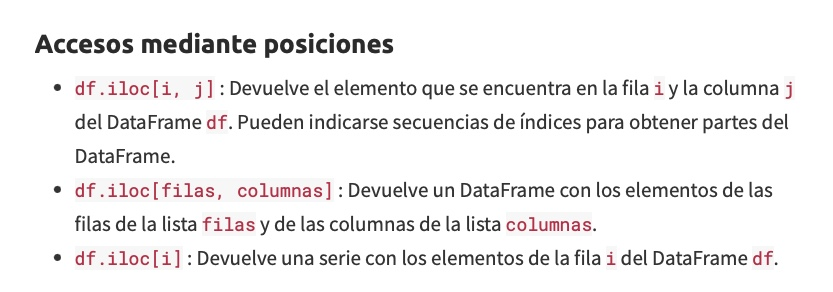

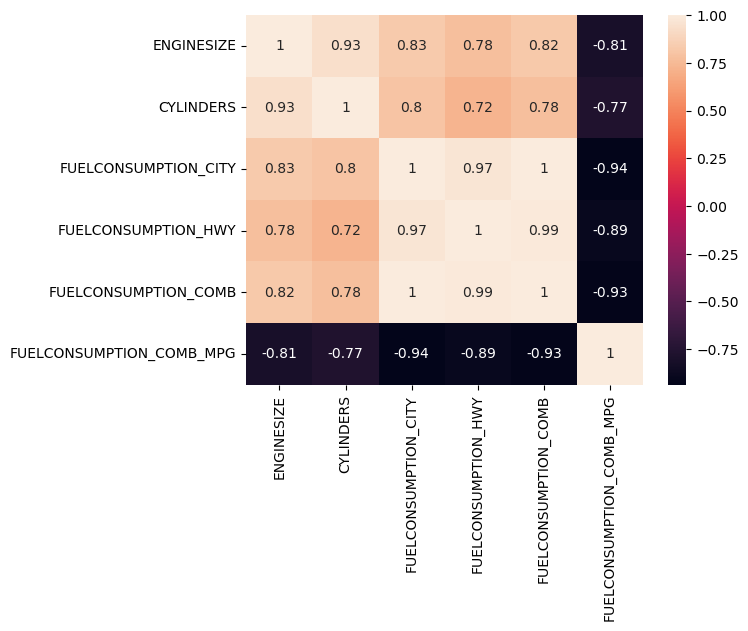

In [6]:
sns.heatmap(data = df._get_numeric_data().iloc[:, 1:-1].corr(), annot = True)
plt.show()

Utilizamos solo tres variables, ya que HWY y COMB son dependientes, por lo que no aportan información adicional.

In [7]:
xxa = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]]

Generamos dos array, uno con las variables numéricas, y otro con la variable objeto de la regresión. Aquí jugamos con el de num para sleccionar las variables.

In [8]:
num = np.array(xxa)

In [9]:
objetivo = np.array(df["CO2EMISSIONS"])

In [10]:
num.shape,objetivo.shape

((1067, 3), (1067,))

### Entrenamiento del modelo: Train, Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(num, objetivo, test_size = 0.40, random_state = 42)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((640, 3), (640,))
Conjunto de Test: ((427, 3), (427,))


### Algoritmo de Regresión Lineal

In [12]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

LinearRegression()

Encontramos los coeficientes de la recta.

In [13]:
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [11.67051533  6.18271251  8.2379017 ]
w_0: 72.18270861168963


### Predicciones

In [14]:
yhat = regresion_lineal.predict(X_test)
resultados_predichos = []
resultados_reales = []
for i, j in zip(yhat, y_test):
    resultados_predichos.append(i)
    resultados_reales.append(j)
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:303.3595168656875 	Valor real:304
Predicción:243.21407649432376 	Valor real:221
Predicción:275.68515448231625 	Valor real:294
Predicción:238.2026090007272 	Valor real:221
Predicción:206.75255713079292 	Valor real:207
Predicción:247.26430086936608 	Valor real:246
Predicción:306.98918093761415 	Valor real:259
Predicción:277.88199010346574 	Valor real:310
Predicción:308.50825180352376 	Valor real:310
Predicción:309.46055144724295 	Valor real:264
Predicción:291.33716770996523 	Valor real:230
Predicción:395.0922765512252 	Valor real:393
Predicción:253.7173547841365 	Valor real:258
Predicción:253.0995585328389 	Valor real:246
Predicción:261.6807215944198 	Valor real:269
Predicción:254.7471388725914 	Valor real:255
Predicción:210.32225269877725 	Valor real:232
Predicción:254.26661006553348 	Valor real:242
Predicción:190.55128862174698 	Valor real:184
Predicción:306.2428752124736 	Valor real:299
Predicción:316.74615350228635 	Valor real:334
Predicción:208.53740491478507 	Valor real:

Ahora convertimos 

In [15]:
df_1 = pd.DataFrame(columns = [resultados_predichos,resultados_reales])

In [16]:
df2 = df_1.T

In [17]:
df3 = df2.reset_index()

In [18]:
df4 = df3.rename(columns={"level_0":"Predicción","level_1":"Valor Real"})

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import cufflinks as cf
from IPython.display import display,HTML
import plotly.express as px

In [20]:
df4.iplot(kind='line', 
                 xTitle='Emisiones', 
                 yTitle='Muestra',
                title='Representación')

In [21]:
px.strip(df4,
         x          = "Valor Real",
         y = "Predicción")

### Metricas

In [22]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [24]:
print(f"MAE:\t {mean_absolute_error(y_test, yhat)}")
print(f"MSE:\t {mean_squared_error(y_test, yhat)}")
print(f"R**2:\t {r2_score(y_test, yhat)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 17.118558596689773
MSE:	 542.3688131548271
R**2:	 0.868684887276896
RAE:	 0.3287278371515071
RSE:	 0.1313151127231041
Adjusted R**2:	 0.8677535744207038


### y_test vs yhat

In [25]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = y_test.flatten()
df_pred["yhat"] = yhat.flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
377,218,218.011085,0.0051
330,329,329.103192,0.0314
25,196,196.180552,0.0921
167,331,330.682045,0.0961
145,255,254.747139,0.0992
15,255,254.747139,0.0992
268,212,212.244553,0.1154
348,212,212.244553,0.1154
4,207,206.752557,0.1195
402,251,251.451978,0.1801


In [26]:
################################################################################################################################